# Polymer stats iPython notebook

Supplementary material for the IB Materials lectures on rubber elasticity and entropic forces.

A Kabla, 2016 - 2020

_______

This notebook generates random polymer configurations in 2D and build the statistics of the end-to-end distances that is required for the calculation of the configurational entropy.

In [13]:
# Load relevant modules

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


rcParams["font.size"] = "12"
rcParams["figure.figsize"] = 8, 8

The function `get_polymer_shape`($n_m$, $a_m$) generates a random configuration for a polymer of $n_m$ monomers, each of length $a_m$. It returns two arrays containing the values of the $x_i$ and $y_i$ coordinates for each monomer of the chain, with $x_0 = y_0 = 0$.

In [14]:
def get_polymer_shape(
    num_monomers: int, monomer_length: float, num_polymers: int = 1
) -> tuple[np.ndarray, np.ndarray]:
    """Get random configuration describing the shape of a polymer.

    Args:
        num_monomers (int): Number of monomers in the polymer
        monomer_length (float): Length of each monomer.
        num_polymers (int, optional): Number of polymers to describe. Defaults to 1.

    Returns:
        tuple[np.ndarray, np.ndarray]: x and y coordinates of each monomer in each polymer.
    """
    thetas = (2 * np.pi) * np.random.rand(num_monomers, num_polymers)
    dx = monomer_length * np.cos(thetas)
    dy = monomer_length * np.sin(thetas)
    x = np.add.accumulate(dx)
    y = np.add.accumulate(dy)
    return x, y

The cell below simply calculates and displays individual polymer configurations. The starting point (0, 0) is indicated with a green star, and end point with a red circle.

(np.float64(-9.68696040800116),
 np.float64(1.7813464251024207),
 np.float64(-0.20237383027523237),
 np.float64(12.932967662068949))

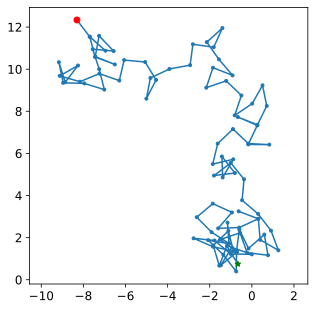

In [15]:
number_of_monomers = 100
monomer_length = 1.0

x, y = get_polymer_shape(number_of_monomers, monomer_length)

rcParams["figure.figsize"] = 5, 5

plt.plot(x, y, ".-")
plt.plot([x[0]], [y[0]], "g*")
plt.plot([x[-1]], [y[-1]], "ro")
plt.axis("equal")

# uncomment this to save the figure
# plt.savefig("polymer_shape.svg")

The cell below extends compares the random configuration of a few distinct polymers, each with the same number of monomers and monomer length.

(np.float64(-11.766715459736393),
 np.float64(9.351381201063699),
 np.float64(-9.06161853893109),
 np.float64(7.104974184835108))

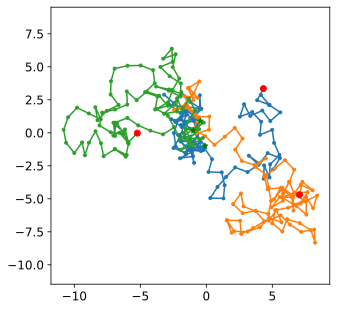

In [16]:
number_of_monomers = 100
monomer_length = 1.0
number_of_polymers = 3

x, y = get_polymer_shape(number_of_monomers, monomer_length, number_of_polymers)

rcParams["figure.figsize"] = 5, 5

plt.plot(x, y, ".-")
plt.plot([x[0]], [y[0]], "g*")
plt.plot([x[-1]], [y[-1]], "ro")
plt.axis("equal")

The function `get_polymer_end_to_end_stats` calculates $n$ different polymer configurations of identical number of monomers $n_m$ and monomer length $a_m$, and returns 3 arrays containing the last of the $x$ and $y$ coordinates of the end-to-end vectors, as well as the end-to-end distance $r$, of each configuration.

In [17]:
def get_polymer_end_to_end_stats(
    num_monomers: int, monomer_length: float, num_polymers: int = 1
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Generate end-to-end statistics for a number of different randomly generated polymers.

    Args:
        num_monomers (int): Number of monomers in each polymer.
        monomer_length (float): Length of each monomer.
        num_polymers (int, optional): Number of polymers to describe. Defaults to 1.

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: Array describing x and y coordinates of the end of each polymer, as well as the straight-line end-to-end distance of each polymer.
    """
    (x, y) = get_polymer_shape(num_monomers, monomer_length, num_polymers)

    xa, ya = x[-1], y[-1]
    ra = np.sqrt(xa**2 + ya**2)
    return (xa, ya, ra)

We can now study the statistics of end-to-end positions. The next cell only calls the function above and present the data.

In [18]:
# number of polymer configurations
number_of_polymers = 50000

xa, ya, ra = get_polymer_end_to_end_stats(number_of_monomers, monomer_length, number_of_polymers)

rcParams["font.size"] = "10.5"
rcParams["figure.figsize"] = 8, 8

plt.subplot(2, 2, 1)
plt.plot(xa, ya, ".")
plt.axis("equal")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("End positions $(x,y)$")

plt.subplot(2, 2, 2)
plt.hist(xa, int(np.sqrt(number_of_polymers)))
plt.xlabel("$x$")
plt.title("Histogram of $x$")

plt.subplot(2, 2, 4)
plt.hist(ya, int(np.sqrt(number_of_polymers)))
plt.xlabel("$y$")
plt.title("Histogram of $y$")

plt.subplot(2, 2, 3)
plt.hist(ra, int(np.sqrt(number_of_polymers)))
plt.xlabel(r"$r = \sqrt{x^2+y^2}$")
plt.title("Histogram of end-to-end distance $r$")

plt.tight_layout()


# plt.savefig("polymer_stats.pdf")

<r>/sqrt(n)r = 0.8849696667126398


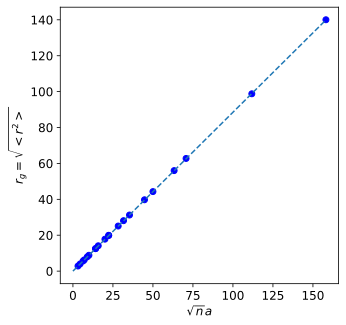

In [19]:
rcParams["font.size"] = "12"
rcParams["figure.figsize"] = 5, 5

number_of_monomers_options = [10, 20, 50, 100, 200, 500, 1000]
monomer_length_options = [1, 2, 5]
total_options = len(number_of_monomers_options) * len(monomer_length_options)

r = []
sqrtna = []

for number_of_monomers in number_of_monomers_options:
    for monomer_length in monomer_length_options:
        (xa, ya, ra) = get_polymer_end_to_end_stats(
            number_of_monomers, monomer_length, number_of_polymers
        )
        r.append(np.mean(ra))
        sqrtna.append(np.sqrt(number_of_monomers) * monomer_length)

plt.plot(sqrtna, r, "bo")
plt.xlabel(r"$ \sqrt{n} a$")
plt.ylabel(r"$ r_g = \sqrt{< r^2 >}$")

# Add linear regression to the plot

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(sqrtna, r)

print("<r>/sqrt(n)r = " + str(slope))

plt.plot([0, max(sqrtna)], [0, slope * max(sqrtna)], "--")

# plt.savefig("length_vs_mon_number.svg")